In [1]:
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt
import numpy as np
df_part2 = pd.read_csv("Part 2.tsv", sep="\t") 

<AxesSubplot:xlabel='x', ylabel='y'>

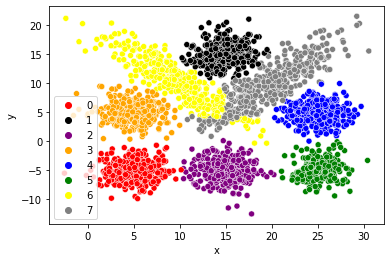

In [2]:
from sklearn.mixture import BayesianGaussianMixture
from sklearn.mixture import GaussianMixture
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df_part2[["x","y"]],df_part2["label"])

gm = GaussianMixture(n_components=8, random_state=1)
gm.fit(X_train, y_train)
sns.scatterplot(x=X_train["x"],y=X_train["y"], hue=gm.predict(X_train),palette=['red','black','purple', 'orange','blue', 
        'green','yellow','grey'])
#Observando o gráfico é possível identificar

In [3]:
def prior(target_data, value):
    return sum(y_train==value)/len(y_train)

def predict_label_point(point, y_train):
    #Identificando a label que cada cluster pertence
    group_clusters = {
    0:[1,7],
    1:[2,3,5,0],
    2:[4,6]
    } 
    
    likeli_cluster = np.power(gm.predict_proba([point]),2)
    bayes_probabilities = dict()
    
    #Fazendo cálculo da probabilidade através do Naive Bayes
    for g in range(3):
        bayes_probabilities[g]=sum([likeli_cluster[0][i] for i in group_clusters[g]])*prior(y_train,g)
    
    return max(bayes_probabilities, key=bayes_probabilities.get)

predict_label_point([25,10], y_train)


def predict_label_points(points, y_train):
    arr = np.array([])
    for point in np.array(points):
        arr=np.append(arr, predict_label_point(point,y_train))
    return arr


print("Taxa de acerto:")
print(sum(predict_label_points(X_test,y_train)==y_test)/len(y_test))

C:\Users\Luiz Luz\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but GaussianMixture was fitted with feature names
  warnings.warn(
C:\Users\Luiz Luz\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but GaussianMixture was fitted with feature names
  warnings.warn(
C:\Users\Luiz Luz\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but GaussianMixture was fitted with feature names
  warnings.warn(
C:\Users\Luiz Luz\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but GaussianMixture was fitted with feature names
  warnings.warn(
C:\Users\Luiz Luz\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, bu

Taxa de acerto:


C:\Users\Luiz Luz\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but GaussianMixture was fitted with feature names
  warnings.warn(
C:\Users\Luiz Luz\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but GaussianMixture was fitted with feature names
  warnings.warn(
C:\Users\Luiz Luz\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but GaussianMixture was fitted with feature names
  warnings.warn(
C:\Users\Luiz Luz\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but GaussianMixture was fitted with feature names
  warnings.warn(
C:\Users\Luiz Luz\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, bu

0.29850746268656714


C:\Users\Luiz Luz\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but GaussianMixture was fitted with feature names
  warnings.warn(
C:\Users\Luiz Luz\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but GaussianMixture was fitted with feature names
  warnings.warn(
C:\Users\Luiz Luz\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but GaussianMixture was fitted with feature names
  warnings.warn(
C:\Users\Luiz Luz\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but GaussianMixture was fitted with feature names
  warnings.warn(
C:\Users\Luiz Luz\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, bu

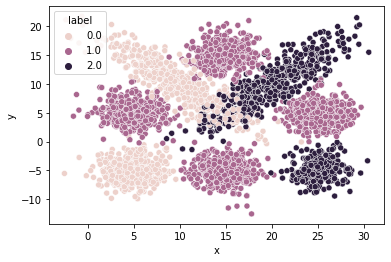

In [4]:
sns.scatterplot(data=df_part2, x="x", y="y", hue="label")
plt.show()

In [5]:
class mixture_gaussian_model:
    def fit(self,X_train,y_train):
        self.y_train = y_train
        self.X_train = X_train
        
        self.gm0 = GaussianMixture(n_components=2)
        self.gm0.fit(X_train[y_train==0])

        self.gm1 = GaussianMixture(n_components=4)
        self.gm1.fit(X_train[y_train==1])

        self.gm2 = GaussianMixture(n_components=2)
        self.gm2.fit(X_train[y_train==2])
        
        self.calculate_prior()
    
    def predict(self, X_test):
        results = np.array([])
        for i in X_test.values:
            results = np.append(results, [self.predict_point(i)])
        print(results)

    def calculate_prior(self):
        self.prior_0 = sum(self.y_train==0)/self.y_train.shape[0]
        self.prior_1 = sum(self.y_train==1)/self.y_train.shape[0]
        self.prior_2 = sum(self.y_train==2)/self.y_train.shape[0]
    
    def predict_point(self, point):
        results=dict()
        
        results[0] = np.exp(self.gm0.score([point])) *self.prior_0
        results[1] = np.exp(self.gm1.score([point])) *self.prior_1
        results[2] = np.exp(self.gm2.score([point])) *self.prior_2
        return max(results, key=results.get)
        


mgm = mixture_gaussian_model()

mgm.fit(X_train,y_train)
mgm.predict(X_test)




C:\Users\Luiz Luz\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but GaussianMixture was fitted with feature names
  warnings.warn(
C:\Users\Luiz Luz\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but GaussianMixture was fitted with feature names
  warnings.warn(
C:\Users\Luiz Luz\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but GaussianMixture was fitted with feature names
  warnings.warn(
C:\Users\Luiz Luz\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but GaussianMixture was fitted with feature names
  warnings.warn(
C:\Users\Luiz Luz\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, bu

[1. 1. 2. 2. 0. 2. 1. 1. 1. 1. 0. 0. 1. 1. 1. 0. 0. 0. 0. 1. 0. 1. 1. 1.
 2. 2. 2. 0. 0. 0. 1. 2. 1. 1. 1. 0. 1. 2. 1. 1. 2. 1. 1. 1. 1. 1. 1. 0.
 0. 0. 0. 1. 1. 1. 1. 1. 0. 0. 2. 0. 1. 1. 0. 1. 0. 2. 2. 2. 0. 1. 0. 2.
 0. 2. 0. 1. 1. 1. 1. 1. 0. 2. 1. 2. 1. 0. 1. 1. 0. 1. 0. 0. 0. 1. 2. 2.
 2. 0. 0. 0. 0. 1. 1. 0. 0. 0. 2. 1. 1. 2. 1. 1. 1. 2. 2. 2. 1. 1. 0. 1.
 1. 0. 0. 0. 1. 0. 1. 2. 1. 1. 0. 1. 1. 1. 1. 1. 1. 0. 0. 1. 1. 0. 2. 0.
 1. 1. 1. 1. 1. 0. 2. 2. 1. 0. 1. 2. 1. 1. 1. 1. 1. 1. 1. 2. 0. 1. 1. 1.
 2. 2. 1. 1. 1. 1. 2. 1. 1. 1. 0. 1. 1. 2. 1. 1. 2. 1. 1. 0. 2. 0. 0. 1.
 1. 2. 1. 1. 1. 1. 1. 1. 2. 0. 1. 2. 2. 1. 0. 0. 2. 1. 1. 0. 0. 1. 0. 0.
 1. 2. 0. 0. 1. 2. 1. 1. 1. 1. 0. 0. 1. 1. 1. 0. 0. 1. 1. 1. 1. 0. 1. 0.
 1. 0. 2. 0. 1. 2. 1. 1. 0. 0. 1. 1. 0. 2. 0. 2. 1. 1. 2. 1. 0. 2. 2. 1.
 0. 0. 1. 1. 0. 1. 2. 2. 1. 1. 1. 0. 0. 0. 1. 1. 1. 1. 1. 2. 0. 2. 0. 2.
 2. 2. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 0. 1. 0. 0. 0. 2. 0. 1.
 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 2. 0. 2. 1. 1.

C:\Users\Luiz Luz\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but GaussianMixture was fitted with feature names
  warnings.warn(
C:\Users\Luiz Luz\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but GaussianMixture was fitted with feature names
  warnings.warn(
C:\Users\Luiz Luz\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but GaussianMixture was fitted with feature names
  warnings.warn(
C:\Users\Luiz Luz\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but GaussianMixture was fitted with feature names
  warnings.warn(
C:\Users\Luiz Luz\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, bu